A trucking company wants to predict its yearly maintenance expense for its yearly trucks using miles driven, and the age of truck at beginning of year

a) Estimate the MLR equation using given data<br>
b) Why is magnitude of miles coefficient so much lower than magnitude of age of truck coefficient<br>
c) Interpret R-Squared for this dataset

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm

In [2]:
# Load the dataset
df = pd.read_excel("C:/Users/Karthik.Iyer/Downloads/AccelerateAI/Regression-Models-main/MLR_Q08_TruckMaintenance.xlsx")
df.head()

,Truck,Maintenance Expense,Miles Driven,Age of Truck
0,1,908.56,10500,10
1,2,751.12,9700,7
2,3,793.55,9200,8
3,4,619.61,8300,9
4,5,380.11,6500,5


In [3]:
# Truck column can be dropped as this a unique number and will not add value in training the model
df.drop(columns='Truck', inplace=True)
df.columns

Index(['Maintenance Expense', 'Miles Driven', 'Age of Truck'], dtype='object')

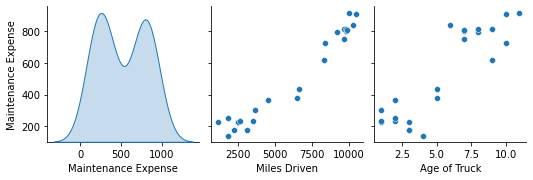

In [4]:
# Check KDE on diagonals
sns.pairplot(data=df, y_vars='Maintenance Expense', diag_kind='kde')
plt.show()

In [5]:
# Correlation of Maintenance Expense with other variables
df.corr().loc['Maintenance Expense']

Maintenance Expense    1.000000
Miles Driven           0.973607
Age of Truck           0.885597
Name: Maintenance Expense, dtype: float64

In [6]:
# Training the linear regression model for Maintenance Expense ~ X
Y = df['Maintenance Expense']
X = df.drop(columns='Maintenance Expense')
X = sm.add_constant(X) #adding a constant

reg_model = sm.OLS(Y,X).fit()
print(reg_model.summary())

                             OLS Regression Results                            
Dep. Variable:     Maintenance Expense   R-squared:                       0.951
Model:                             OLS   Adj. R-squared:                  0.946
Method:                  Least Squares   F-statistic:                     195.0
Date:                 Tue, 10 May 2022   Prob (F-statistic):           7.62e-14
Time:                         22:55:51   Log-Likelihood:                -127.47
No. Observations:                   23   AIC:                             260.9
Df Residuals:                       20   BIC:                             264.3
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           11.4184     29.191    

In [7]:
# Choosing the relevent variables 
reg_model.pvalues[reg_model.pvalues < 0.05]

Miles Driven    6.904518e-08
dtype: float64

In [8]:
# Check for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
               index=X.columns)

const           4.468943
Miles Driven    4.492510
Age of Truck    4.492510
dtype: float64

a) Estimate the MLR equation using given data

Maintenance Expense = 11.4184 + 0.0712 * (Miles Driven) + 10.7086 * (Age of Truck)

b) Why is magnitude of miles coefficient so much lower than magnitude of age of truck coefficient

This is because Miles Driven has significantly lesser influence on Truck Maintenance Expense comapred to Age of Truck. As the age of truck increases, its maintenance expenses also increases.

c) Interpret R-Squared for this dataset

R-squared of 0.951 indicate that the independent variables (Miles Driven and Age of Truck) explain about 95% of variance in Truck Maintenance Expense